In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-15 18:49:57.945086
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 15.241725206375122 seconds. That means the whole run will probably take 45.725175619125366 more seconds and 0.7620862603187561 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensembl

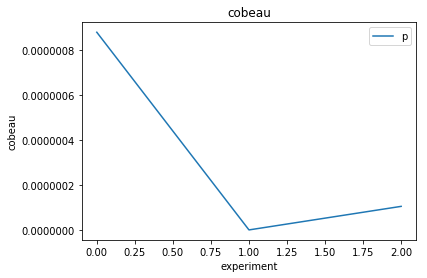

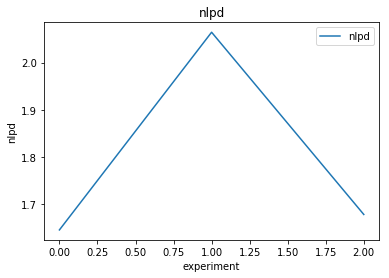

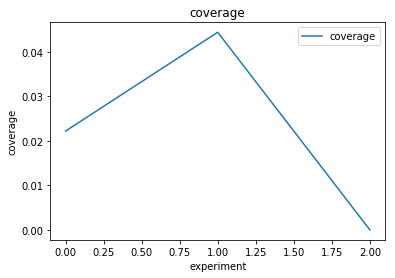

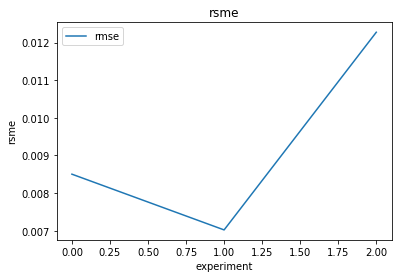

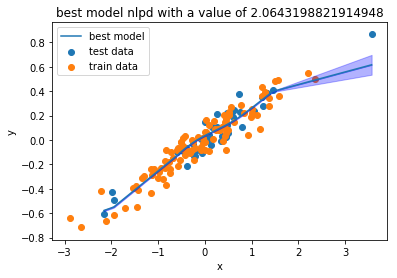

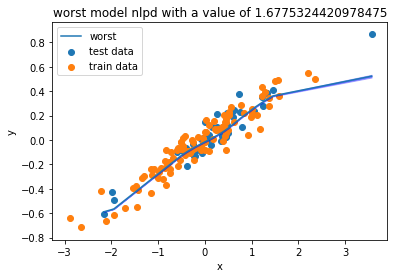

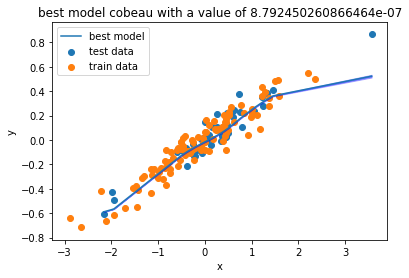

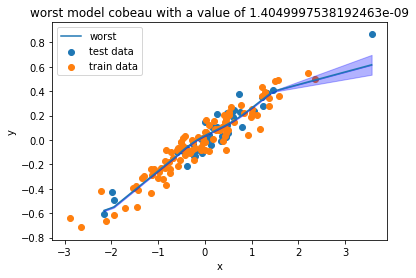

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 18:50:41.537250
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 35.77927207946777 seconds. That means the whole run will probably take 107.33781623840332 more seconds and 1.7889636039733887 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 111.20802903175354 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.355693  0.007407 -17.124923  0.007308
std    0.236888  0.012830  12.773343  0.001299
min    0.091724  0.000

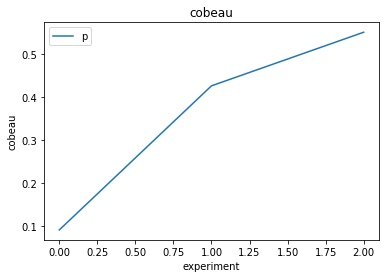

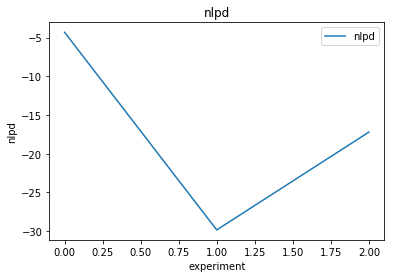

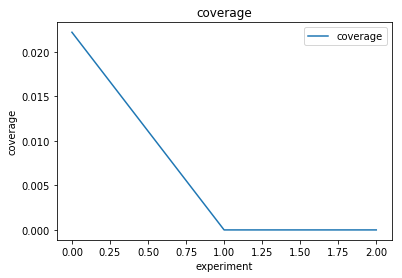

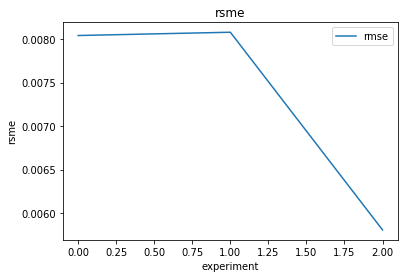

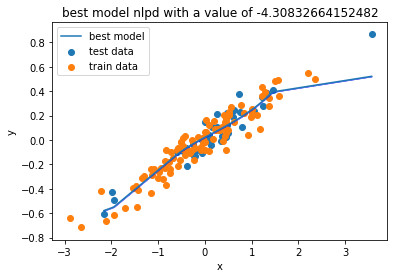

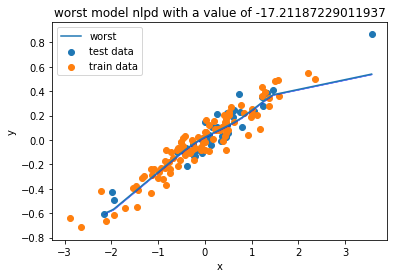

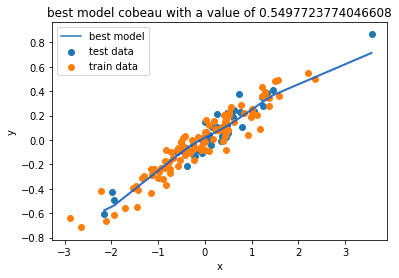

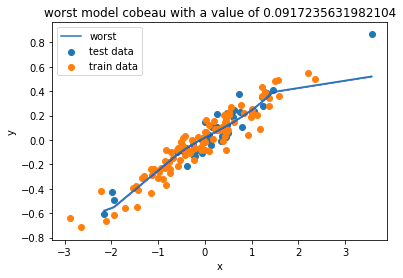

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 18:52:36.641985
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:31: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


experiment number 1 took 51.586971044540405 seconds. That means the whole run will probably take 154.76091313362122 more seconds and 2.57934855222702 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 159.3006100654602 seconds with 3 experiments


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


             cobeau  coverage      nlpd      rsme
count  3.000000e+00       3.0  3.000000  3.000000
mean   3.893965e-01       0.0       inf  0.008000
std    5.354432e-01       0.0       NaN  0.001577
min    7.398374e-15       0.0 -2.861357  0.006319
25%    8.409468e-02       0.0 -2.545841  0.007277
50%    1.681894e-01       0.0       NaN  0.008235
75%    5.840947e-01       0.0       inf  0.008841
max    1.000000e+00       0.0       inf  0.009447
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &       3.0 &  3.000000 &  3.000000 \\
mean  &  3.893965e-01 &       0.0 &       inf &  0.008000 \\
std   &  5.354432e-01 &       0.0 &       NaN &  0.001577 \\
min   &  7.398374e-15 &       0.0 & -2.861357 &  0.006319 \\
25\%   &  8.409468e-02 &       0.0 & -2.545841 &  0.007277 \\
50\%   &  1.681894e-01 &       0.0 &       NaN &  0.008235 \\
75\%   &  5.840947e-01 &       0.0 &       inf &  0.008841 \\
max   &  1.000000e+00

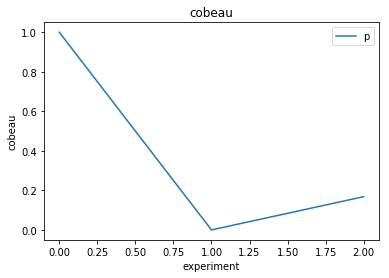

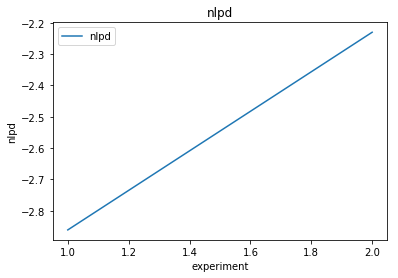

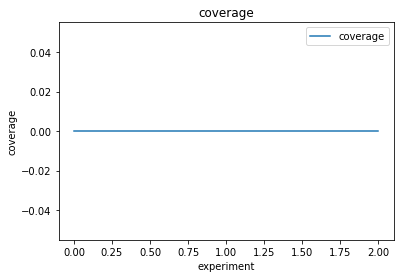

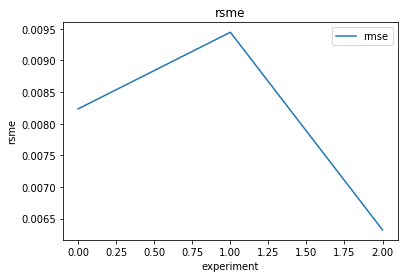

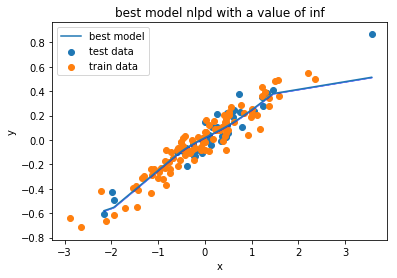

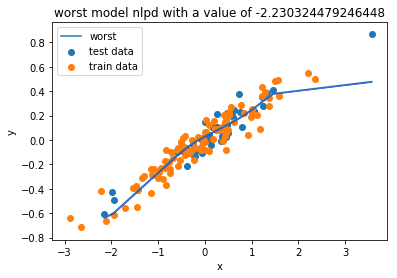

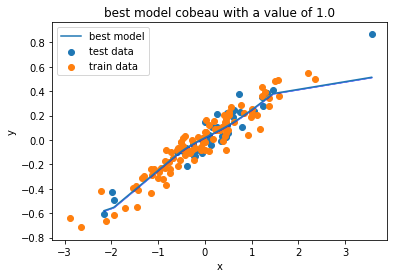

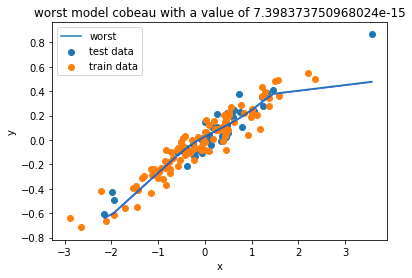

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-15 18:55:20.252987
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 25.08777093887329 seconds. That means the whole run will probably take 75.26331281661987 more seconds and 1.2543885469436646 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleN

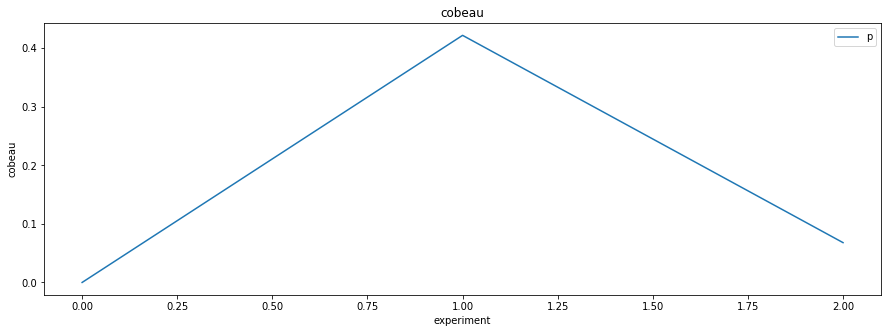

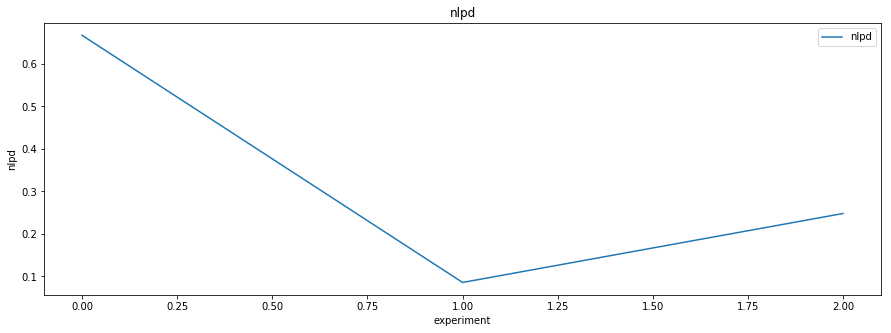

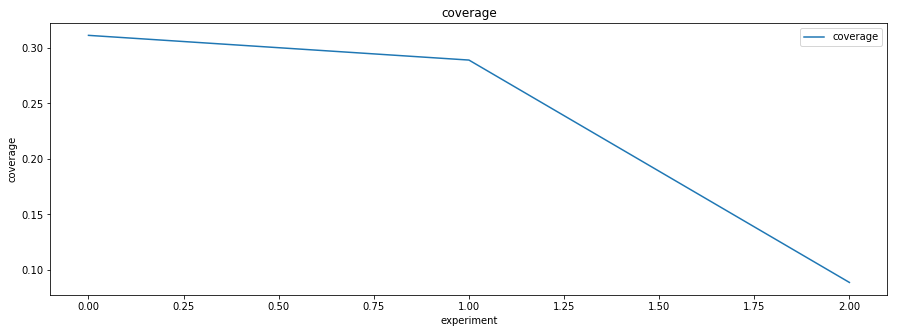

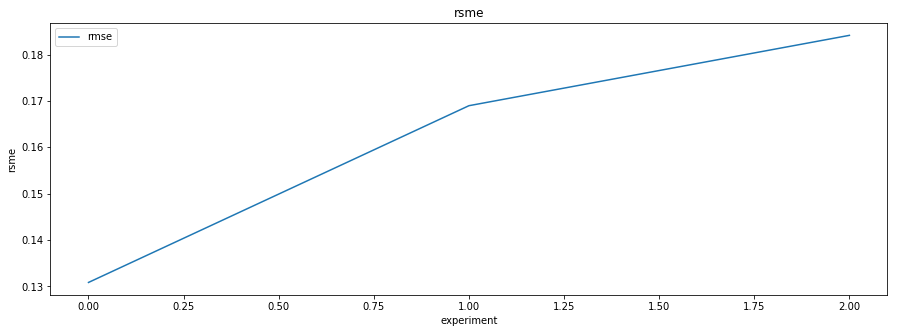

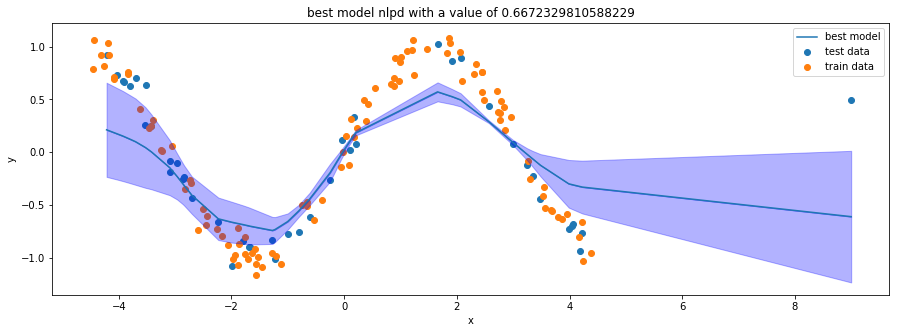

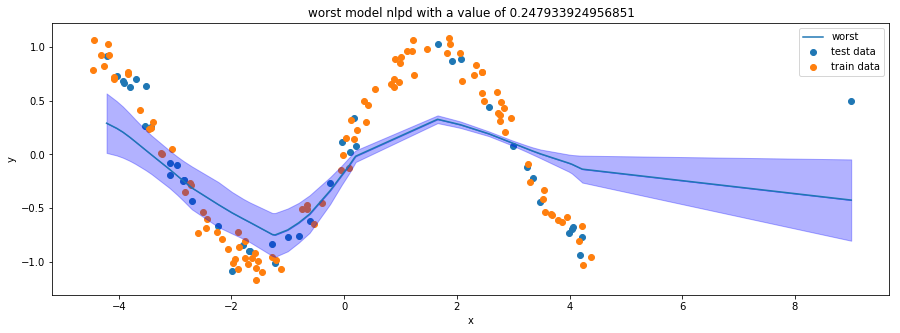

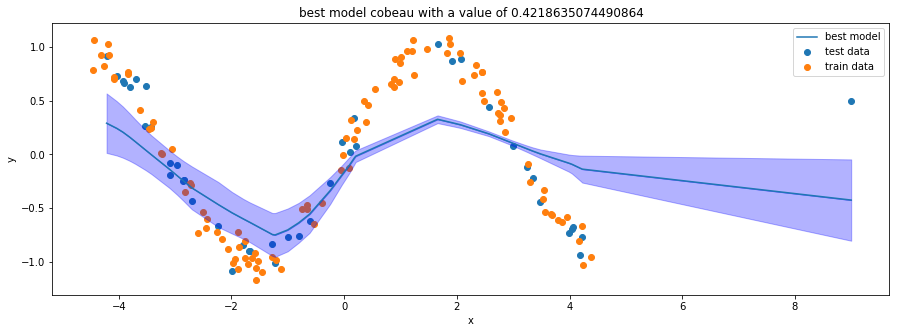

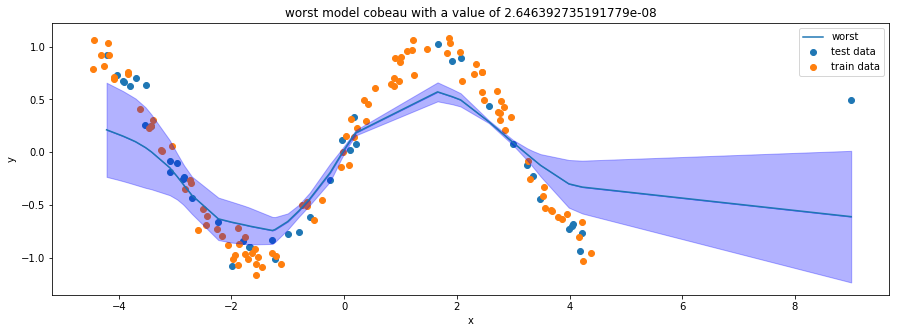

In [7]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 18:56:39.354830
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 93.30590009689331 seconds. That means the whole run will probably take 279.91770029067993 more seconds and 4.6652950048446655 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 260.9561610221863 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00  3.000000   3.000000  3.000000
mean   1.857626e-01  0.037037 -25.734820  0.136613
std    3.171605e-01  0.046259  40.697124  0.056461
min    

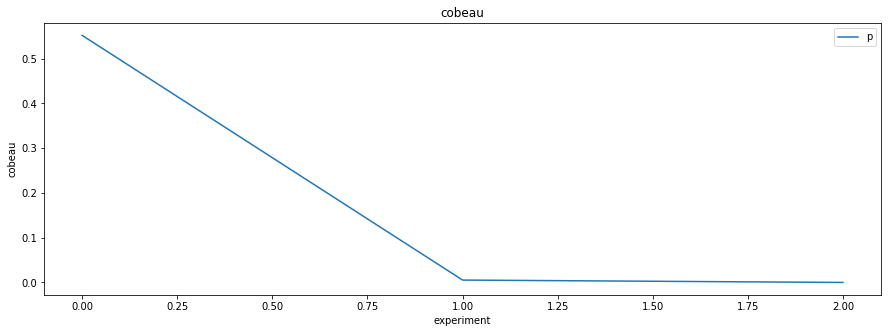

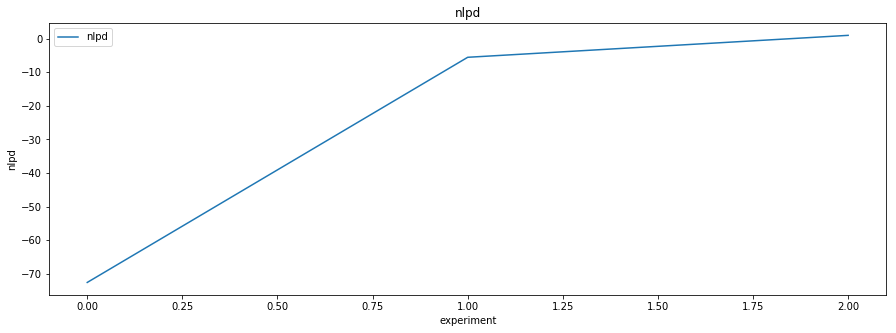

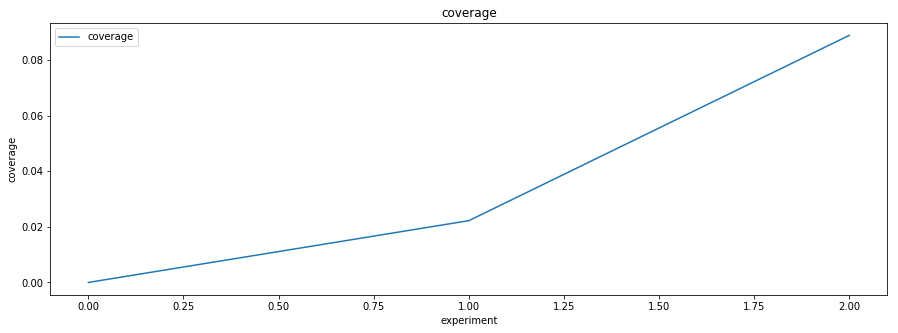

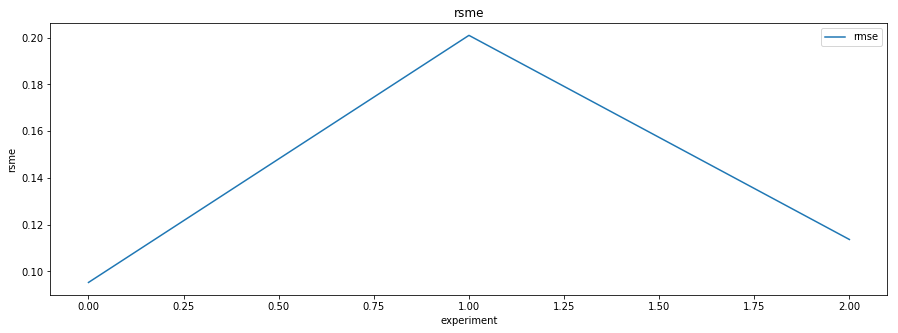

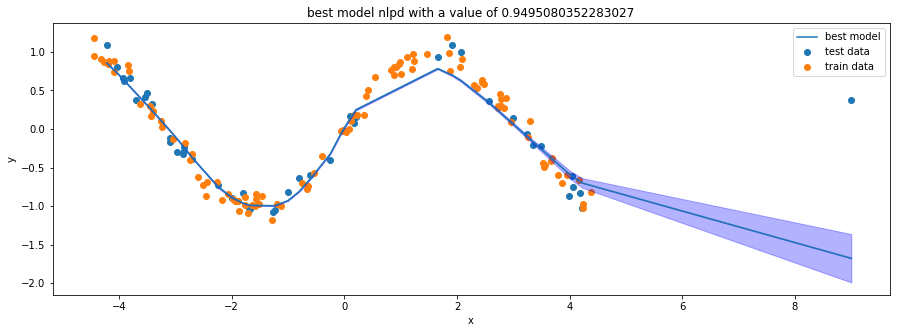

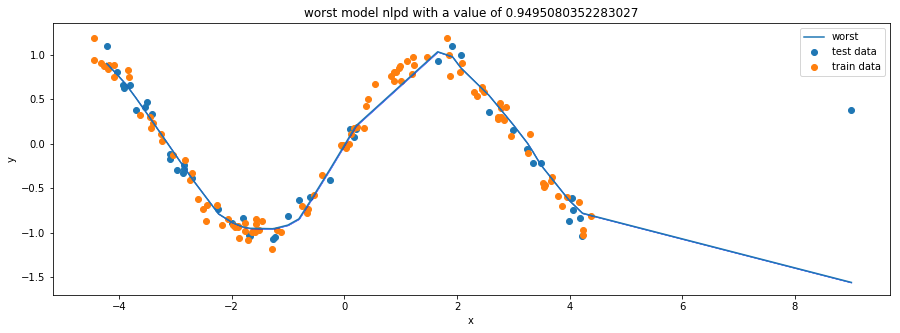

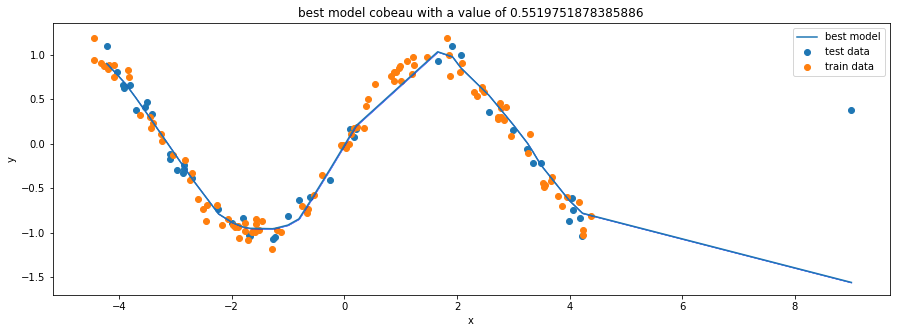

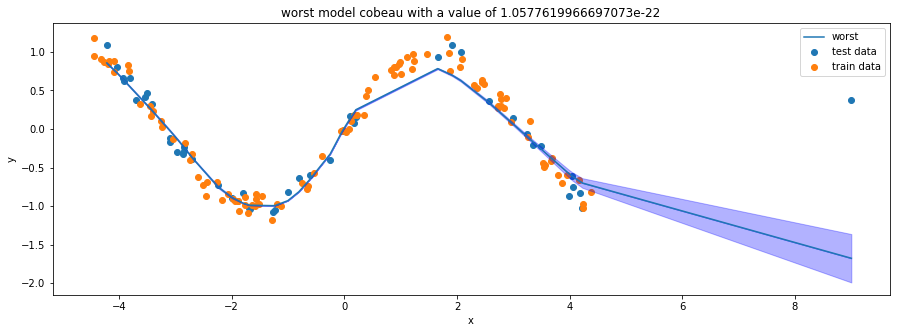

In [8]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 19:01:05.939279
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 83.81420421600342 seconds. That means the whole run will probably take 251.44261264801025 more seconds and 4.190710210800171 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 249.20354986190796 seconds with 3 experiments
             cobeau  coverage        nlpd      rsme
count  3.000000e+00  3.000000    3.000000  3.000000
mean   2.783635e-01  0.037037 -154.602307  0.145148
std    2.898971e-01  0.033945  263.806003  0.068110


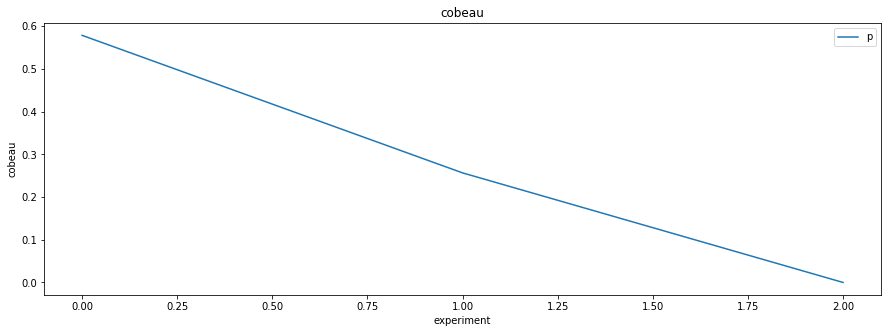

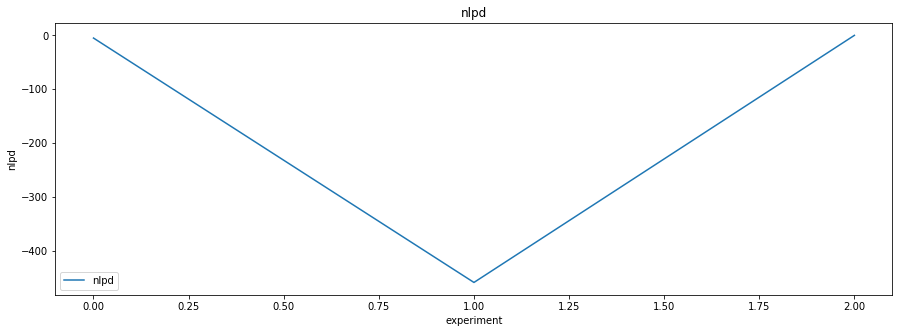

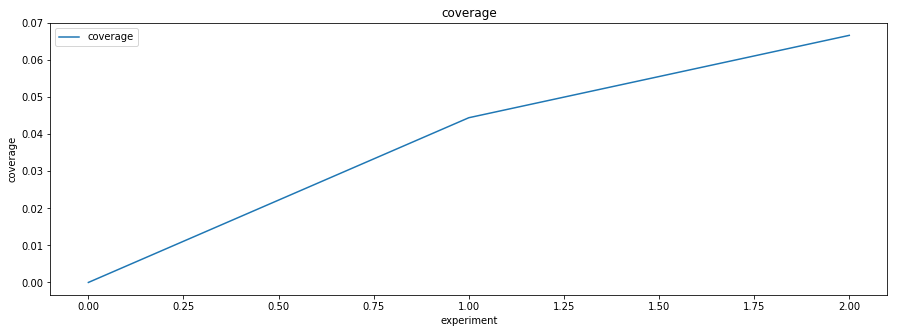

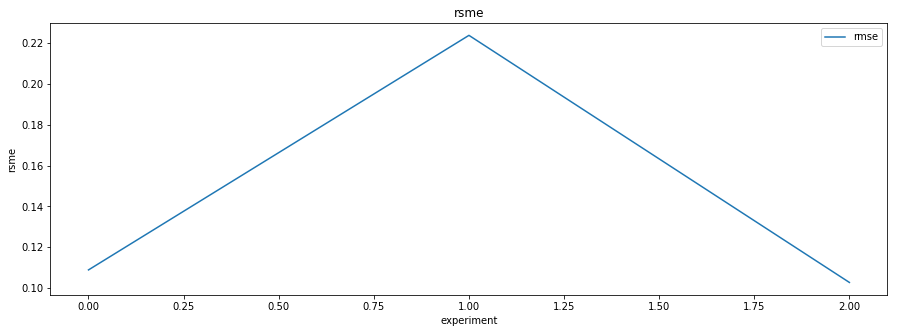

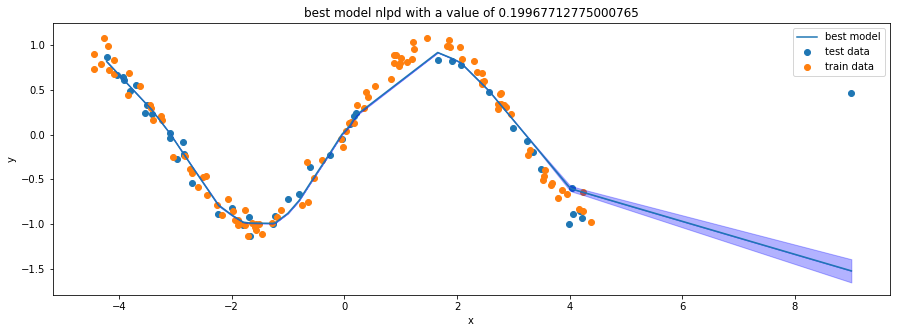

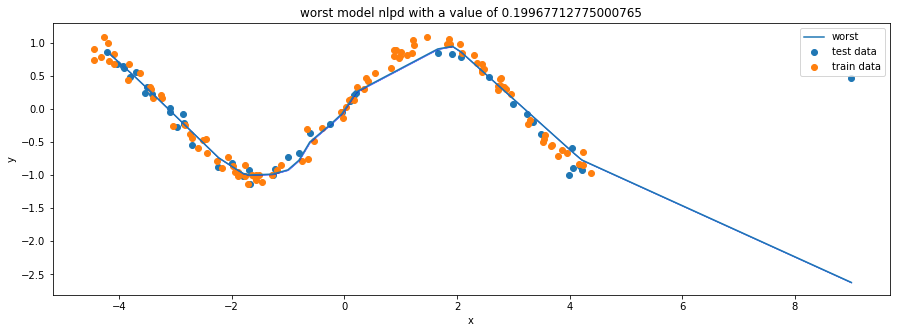

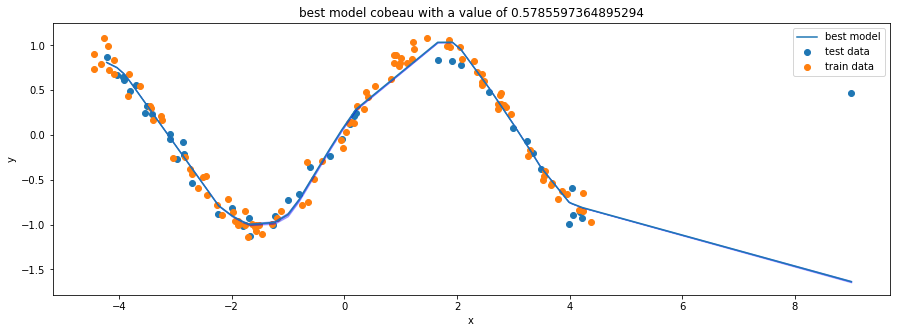

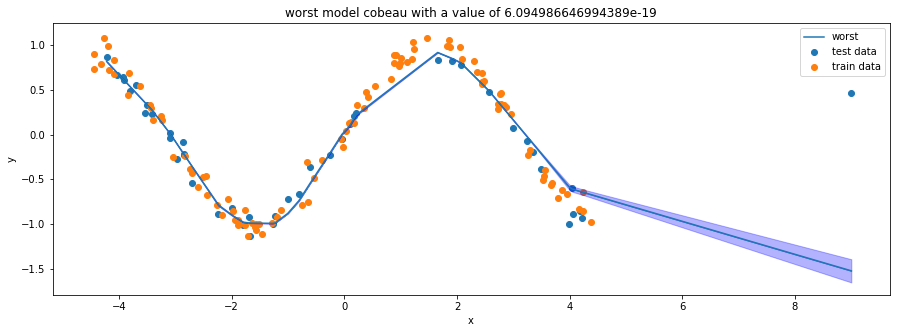

In [9]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 19:05:20.608474
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 82.4695188999176 seconds. That means the whole run will probably take 247.4085566997528 more seconds and 4.12347594499588 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 242.02893495559692 seconds with 3 experiments
             cobeau  coverage        nlpd      rsme
count  3.000000e+00  3.000000    3.000000  3.000000
mean   3.155028e-01  0.007407 -112.531268  0.241964
std    4.782699e-01  0.012830   71.331255  0.107463
min    1.602858e-13  0.0000

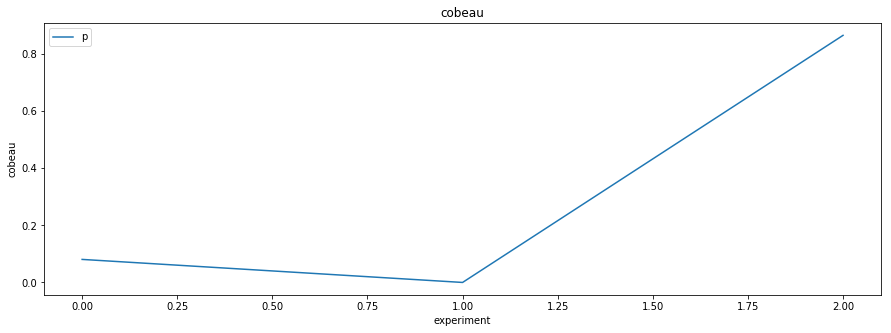

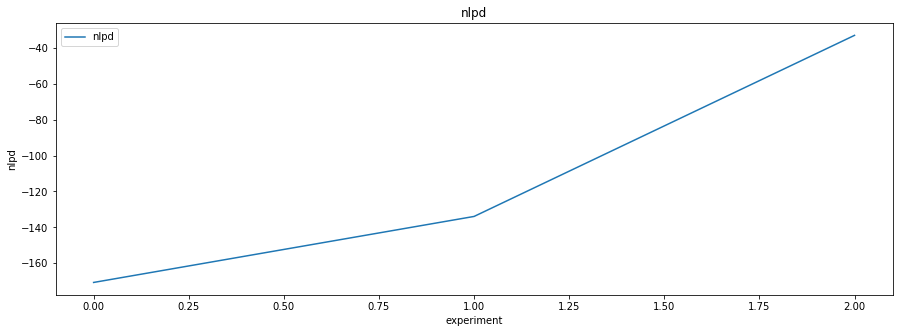

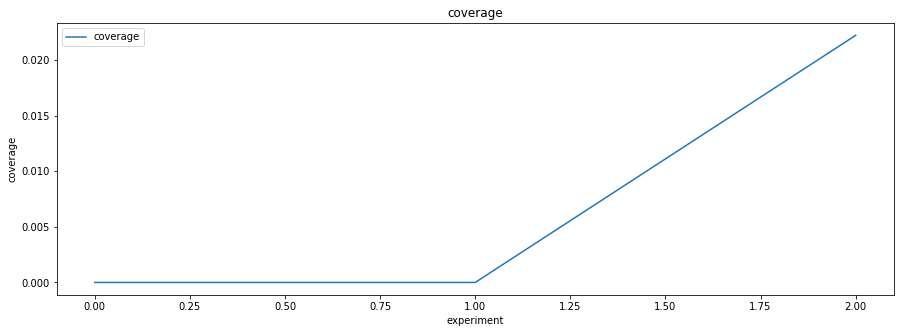

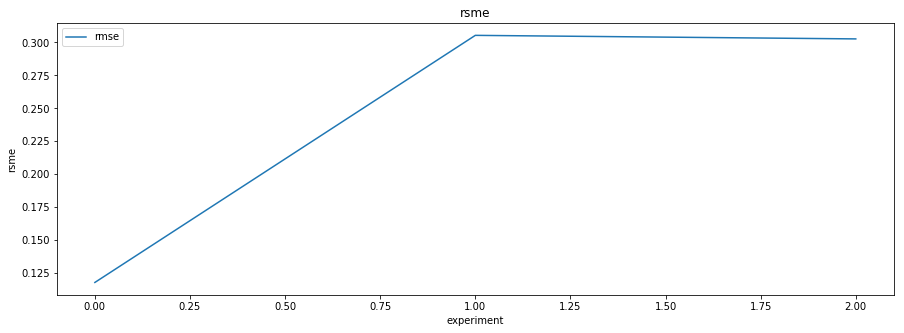

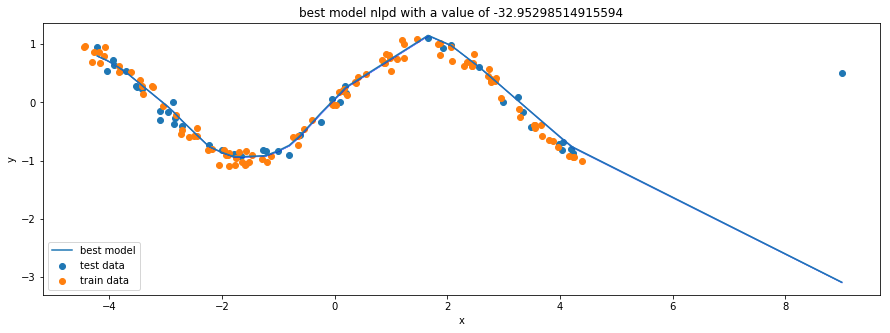

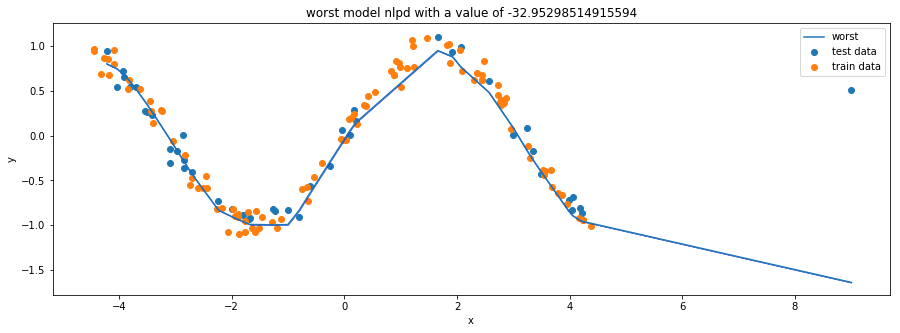

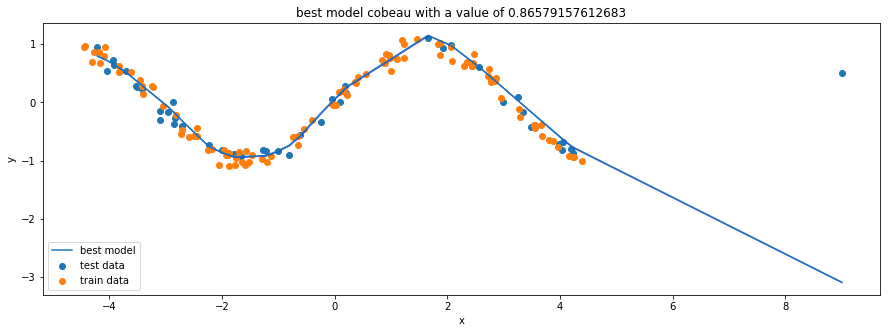

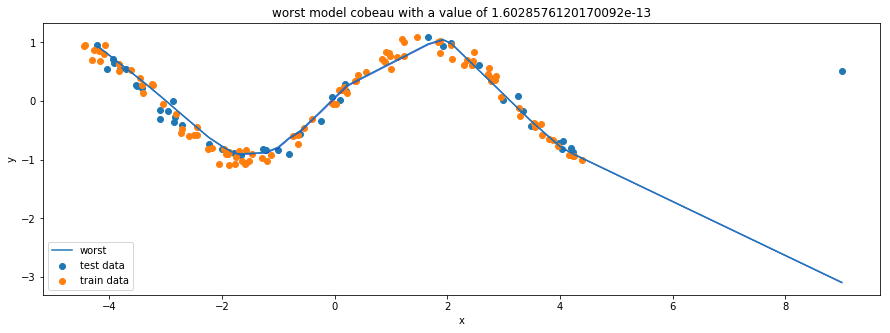

In [10]:
pd44 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [11]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-15 19:09:27.096804
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 20.06752610206604 seconds. That means the whole run will probably take 60.20257830619812 more seconds and 1.003376305103302 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNe

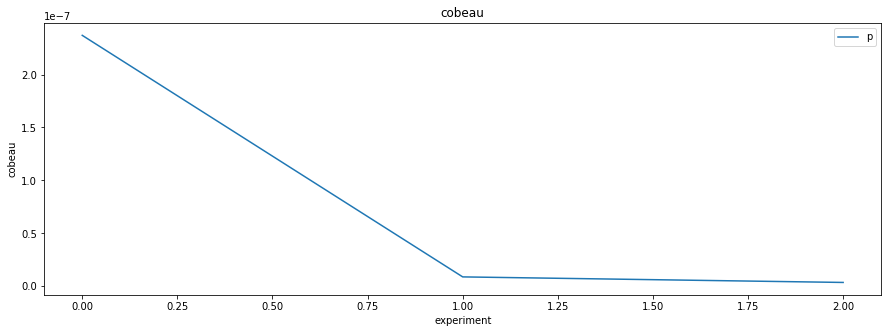

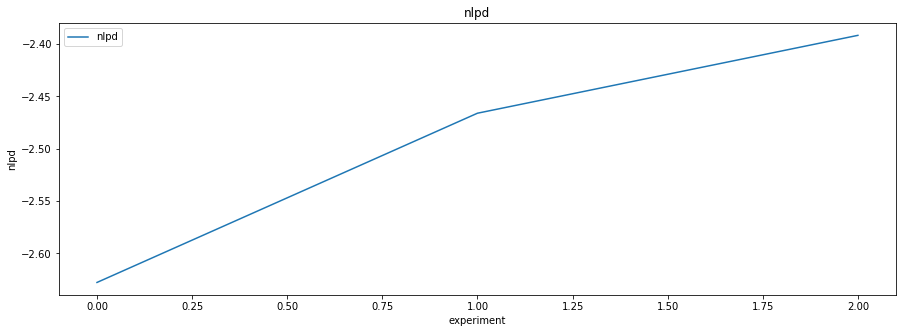

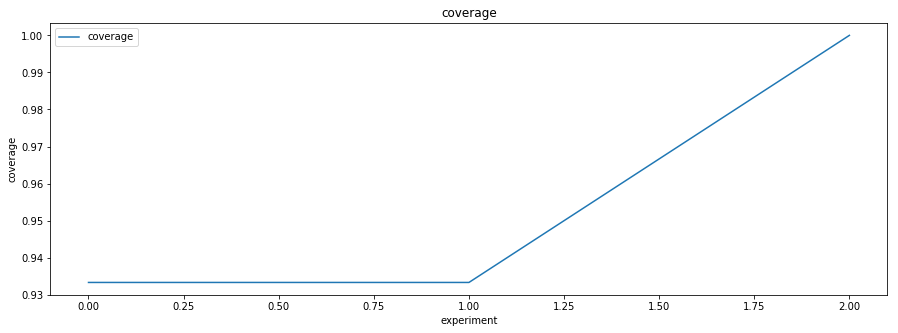

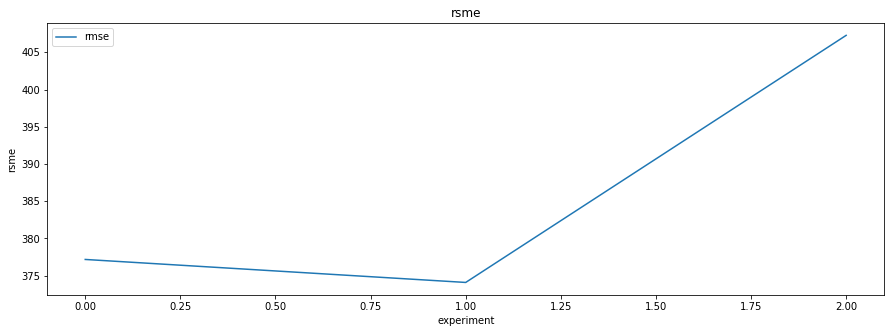

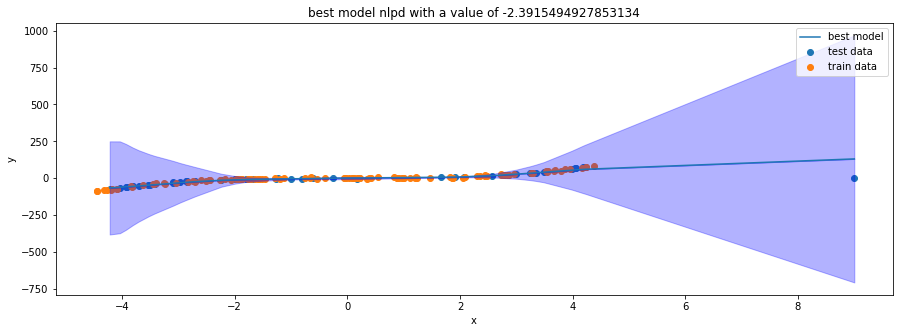

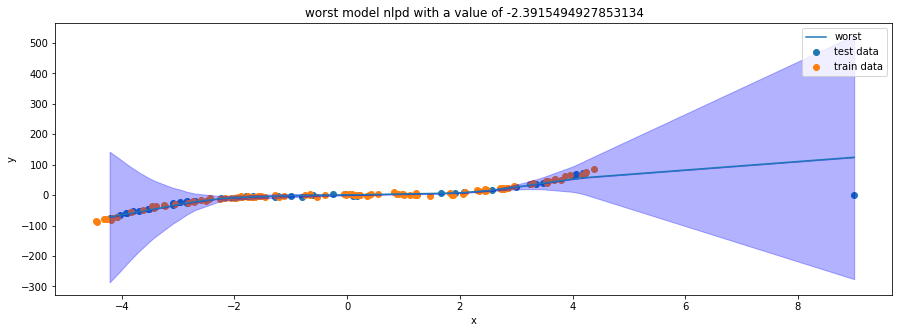

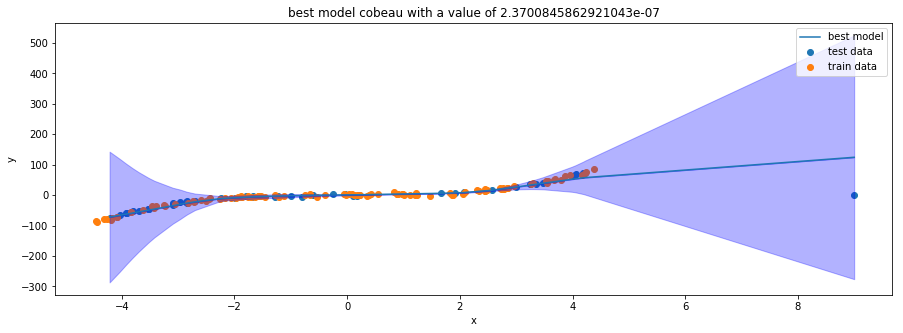

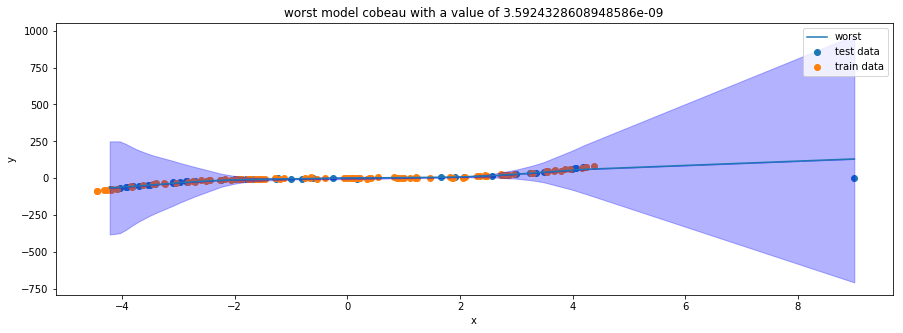

In [12]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 19:10:29.766735
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 62.60269522666931 seconds. That means the whole run will probably take 187.80808568000793 more seconds and 3.1301347613334656 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 188.66743183135986 seconds with 3 experiments
             cobeau  coverage       nlpd        rsme
count  3.000000e+00  3.000000   3.000000    3.000000
mean   5.810076e-13  0.562963 -11.753254  712.957709
std    1.006317e-12  0.219239   9.716407  136.55157

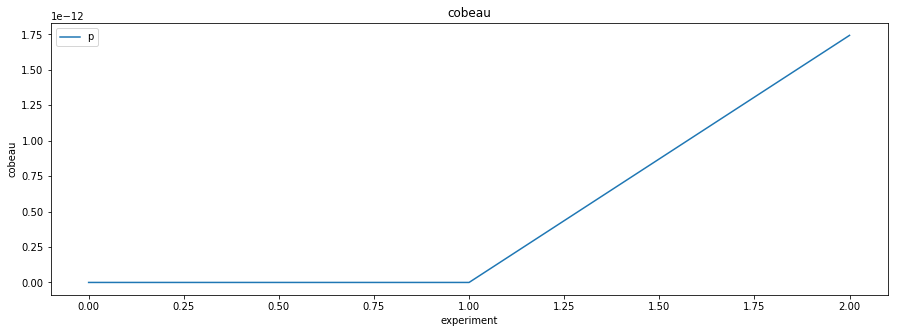

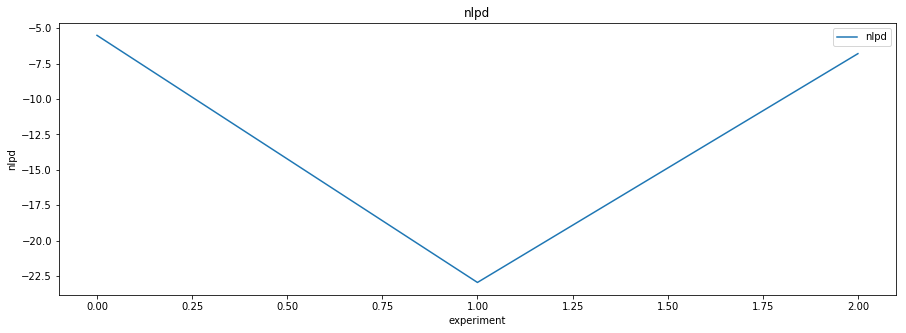

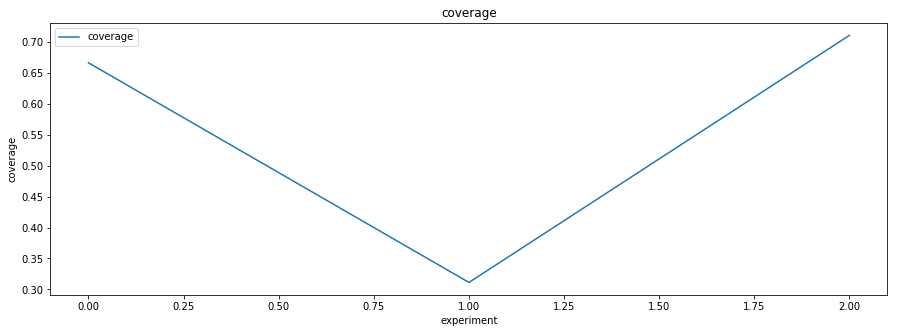

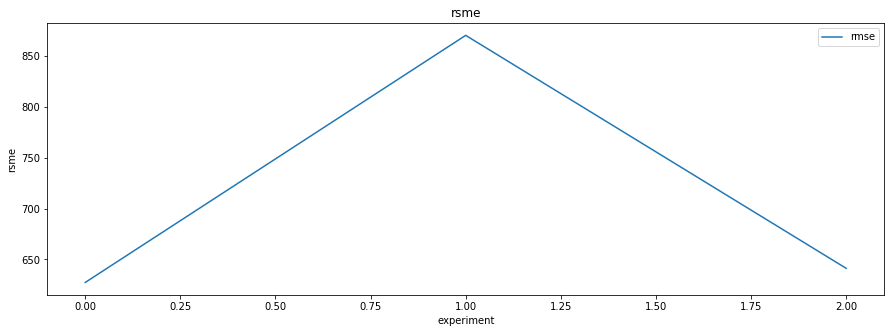

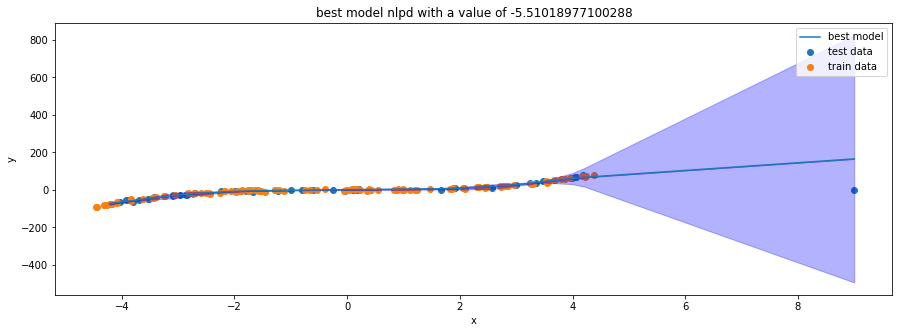

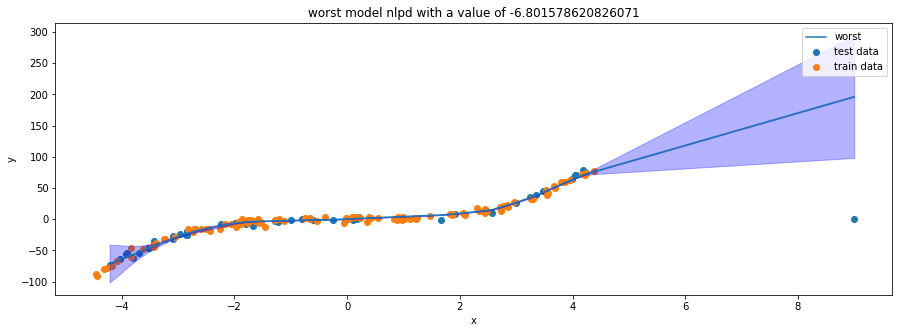

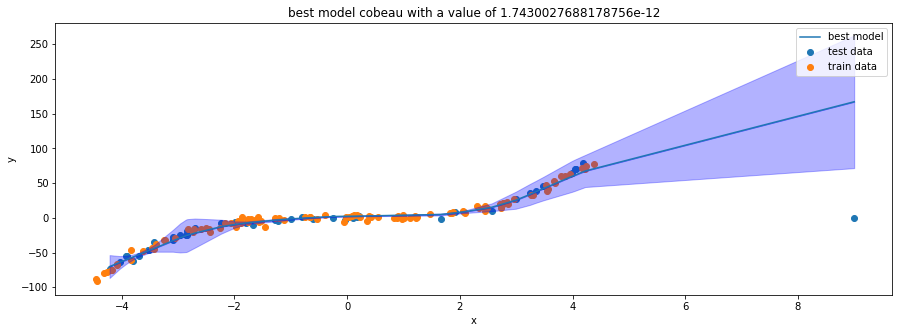

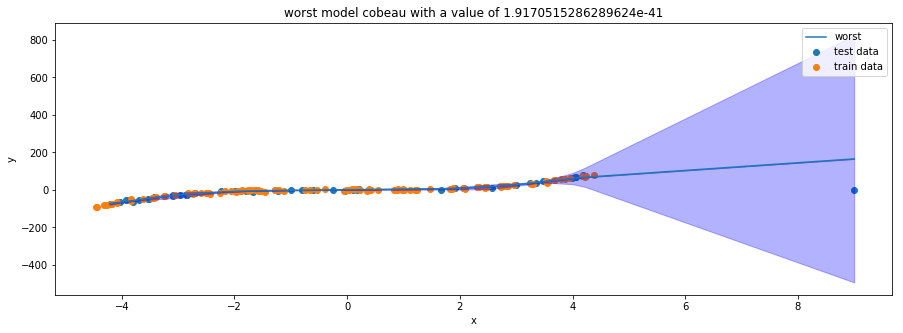

In [13]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 19:13:42.839315
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 62.394176721572876 seconds. That means the whole run will probably take 187.18253016471863 more seconds and 3.119708836078644 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 192.6068778038025 seconds with 3 experiments
             cobeau  coverage       nlpd        rsme
count  3.000000e+00  3.000000   3.000000    3.000000
mean   7.086644e-05  0.570370 -12.786421  815.509466
std    1.227443e-04  0.166790   4.222724  154.880

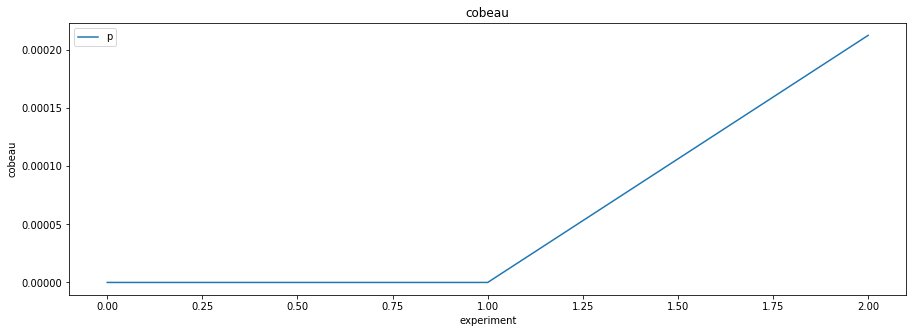

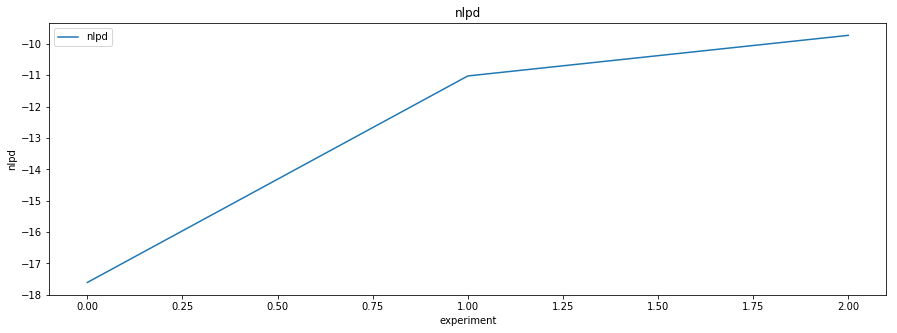

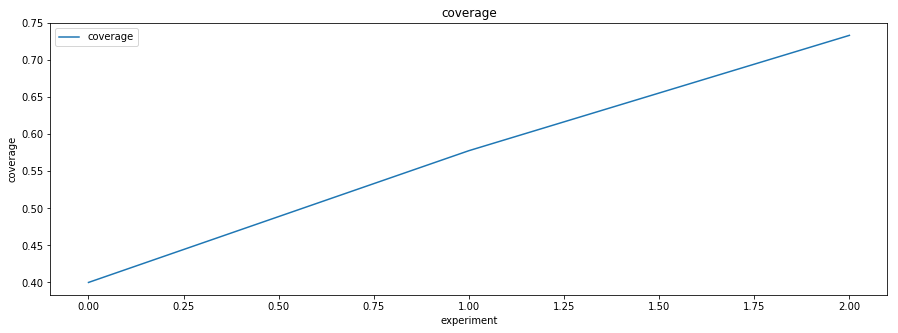

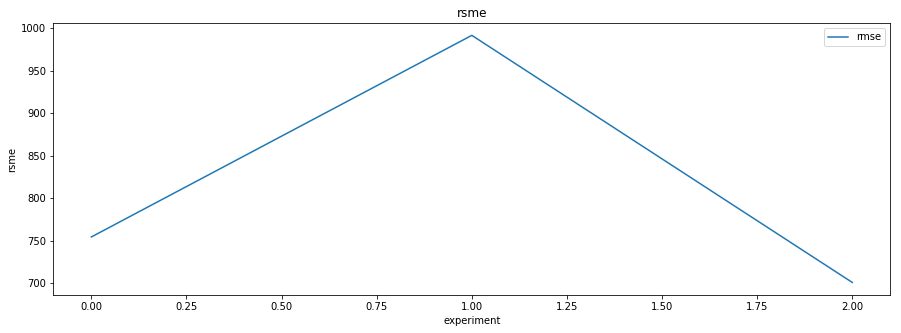

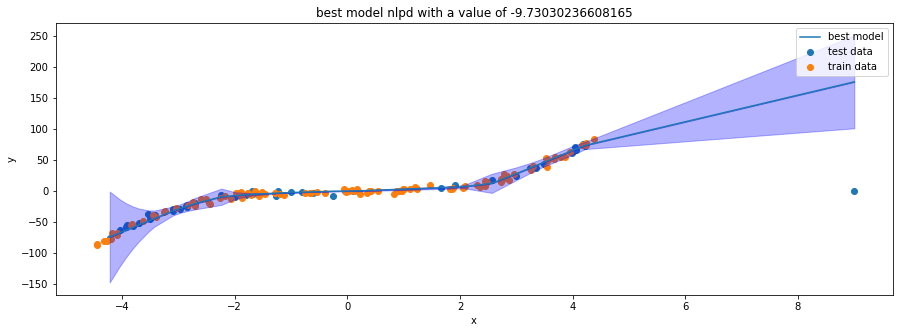

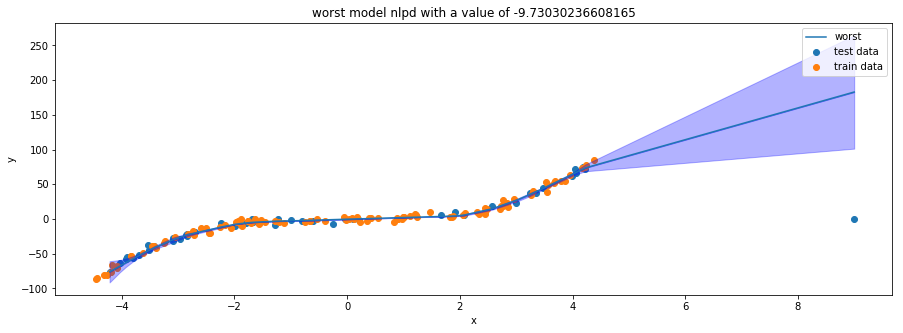

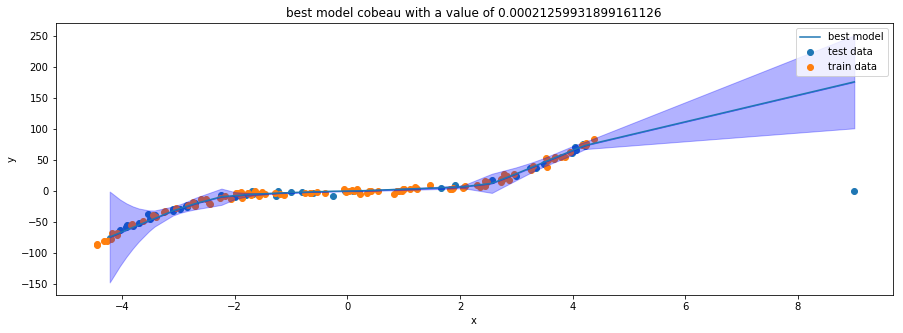

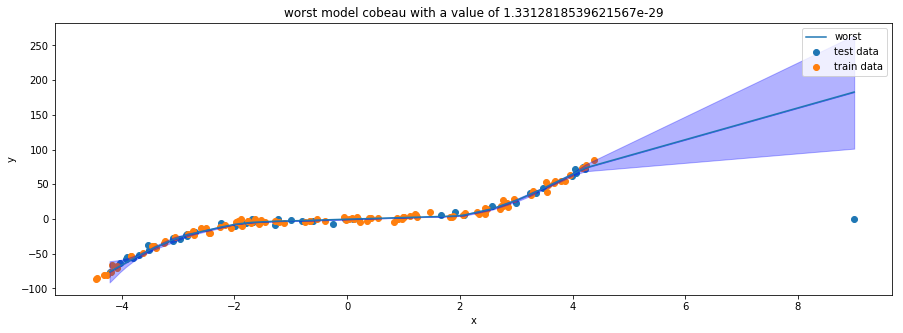

In [14]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 19:16:59.777374
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 64.77412509918213 seconds. That means the whole run will probably take 194.3223752975464 more seconds and 3.2387062549591064 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 193.62549662590027 seconds with 3 experiments
             cobeau  coverage         nlpd         rsme
count  3.000000e+00       3.0     3.000000     3.000000
mean   2.590543e-14       0.0 -2234.998689   846.369586
std    4.486952e-14       0.0  1256.020740   224.226325
min    3

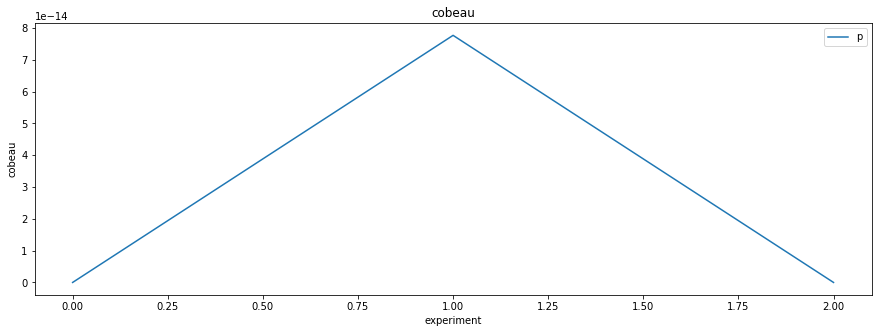

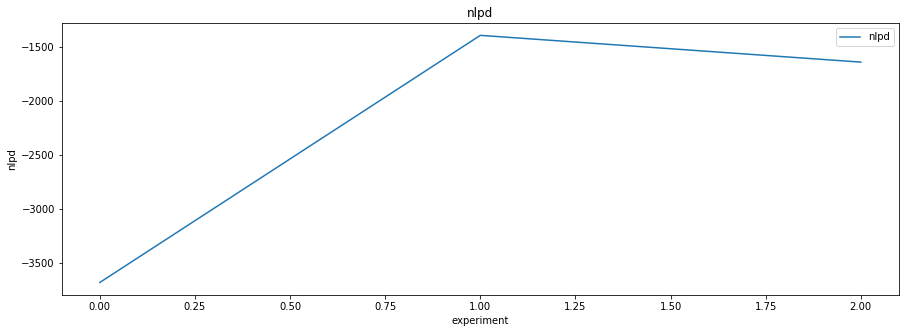

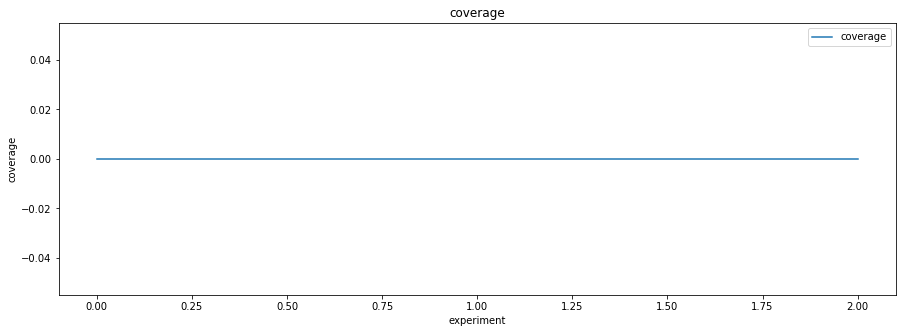

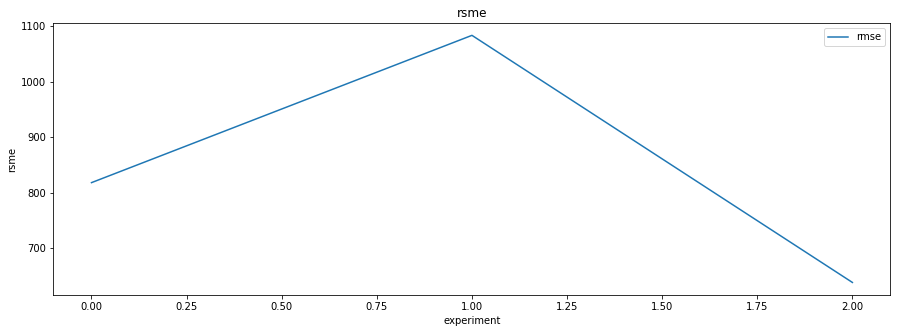

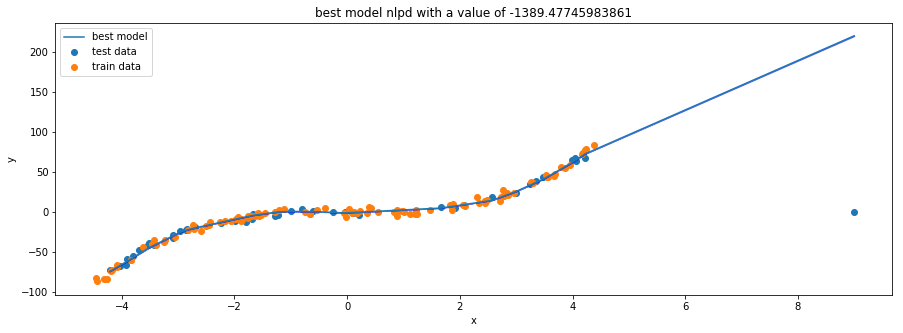

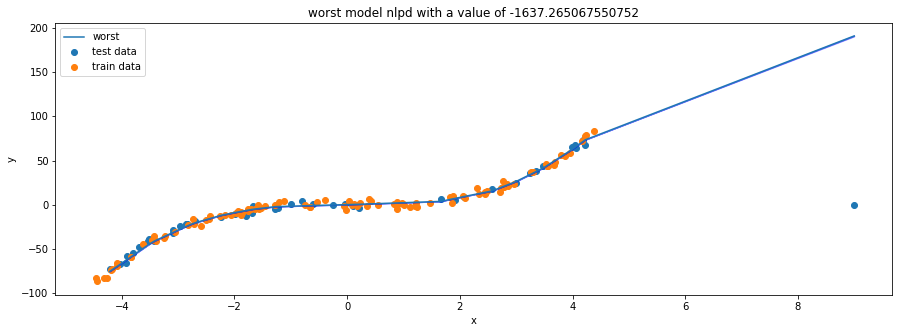

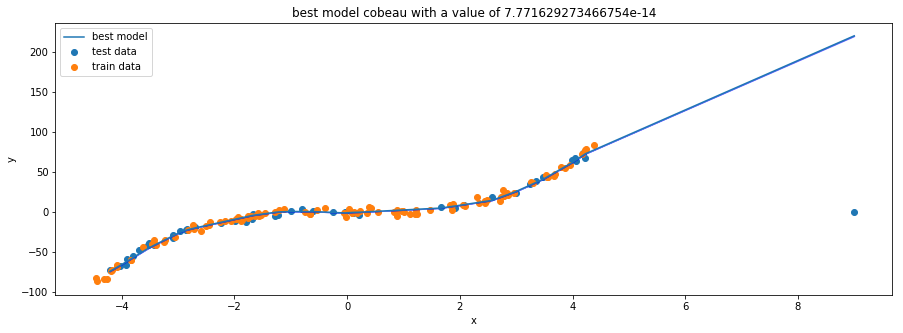

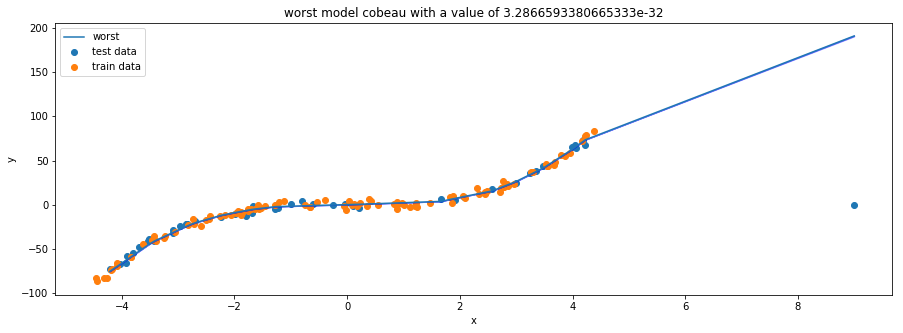

In [15]:
pd444 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)